### Plotter, loader and handler for RNAseq data from other retinal cells in zebrafish

Müller Glia: [Charlton-Perkins, 2019](https://www-ncbi-nlm-nih-gov.ezproxy.nihlibrary.nih.gov/pubmed/30924555)  
> Issues:
>    - in original paper, data aligned to GRCz10 not GRCz11; tried to fix by remapping ENSEMBLIDs in table to GRCz11
>    - Considered downloading original files and remapping but not sure it's worth it
>    - Most photoreceptor genes are present in alternating samples, which could reflect circadian variations or inconsistencies in collection
>    - Decided to modify table to include baseMean (as mean of MG192 samples only), and to de-transform from log2 into linear scale
>    - Also included differential expression analysis for 192hpf in new table
>    - For heatmaps, will accept that inter-sample variability can be ignored and calculate mean to declutter plot (although 48MG1 is consistently weird)
     
Rods: [Sun, 2018](https://www-ncbi-nlm-nih-gov.ezproxy.nihlibrary.nih.gov/pubmed/29422031)
>
> - top50 rod-enriched transcripts are 95% consistent with my RNAseq
> - counts are in log2 CPM


In [1]:
# External libraries
import numpy as np
import pandas as pd
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import importlib
import svgutils
from svgutils.compose import *

from fx_RNAseq import *
def findgene_glia(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "glia8dpf_DEGcounts.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_glia(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "glia8dpf_DEGcounts.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_glia(genename):
    gdf = findgene_glia(genename)
    n = np.arange(1,19) # GFP+
    n = np.append(n, 19.5 + np.arange(1,19)) # GFP-
    h_start = 5
    h_end = 41
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end]
    return n, h

#glia Colors
gC = {
    'm48' : '#c7ffec',
    'm60' : '#94ffdb',
    'm72' : '#57ffc7',
    'm96' : '#2effb9',
    'm120': '#05ffac',
    'm192': '#00d68f',
    
    'c48' : '#e3e3e3',
    'c60' : '#c9c9c9',
    'c72' : '#ababab',
    'c96' : '#969696',
    'c120': '#828282',
    'c192': '#6b6b6b',
    
    'plt' : '',
}

gC['plt']=[
    gC['m48'],gC['m48'],gC['m48'],
    gC['m60'],gC['m60'],gC['m60'],
    gC['m72'],gC['m72'],gC['m72'],
    gC['m96'],gC['m96'],gC['m96'],
    gC['m120'],gC['m120'],gC['m120'],
    gC['m192'],gC['m192'],gC['m192'],
    gC['c48'],gC['c48'],gC['c48'],
    gC['c60'],gC['c60'],gC['c60'],
    gC['c72'],gC['c72'],gC['c72'],
    gC['c96'],gC['c96'],gC['c96'],
    gC['c120'],gC['c120'],gC['c120'],
    gC['c192'],gC['c192'],gC['c192'],
]

def findgene_rods(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfRods_Sun2018/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "zfRods.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_rods(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfRods_Sun2018/" #directory path
#     fPath = "glia_23615_sup-0006-tables2.csv" #file path
    fPath = "zfRods.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_rods(genename):
    gdf = findgene_rods(genename)
    n = np.arange(1,5) # GFP+
    n = np.append(n, 4.5 + np.arange(1,5)) # GFP-
    h_start = 7
    h_end = 15
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#rod Colors
rC = {
    'r' : '#747474',
    'c': '#dac910',
    'plt' : '',
}

rC['plt']=[
    rC['r'],rC['r'],rC['r'],rC['r'],
    rC['c'],rC['c'],rC['c'],rC['c'],
]


def findgene_sqcones(genename):
    dPath = "~/Documents/LiLab/RNAseq/sqCones_Kunze/" #directory path
    fPath = "sqConesAwHib_Adult.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_sqcones(genename):
    dPath = "~/Documents/LiLab/RNAseq/sqCones_Kunze/" #directory path
    fPath = "sqConesAwHib_Adult.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_sqcones(genename):
    gdf = findgene_sqcones(genename)
    n = np.arange(1,8) # GFP+
    n = np.append(n, 7.5 + np.arange(1,7)) # GFP-
    h_start = 8
    h_end = 21
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#squirrel Colors
sqC = {
    's' : '#4669F2',
    'sHib' : '#548ced',
    'm' : '#04CD22',
    'mHib' : '#53e477',
    'plt' : '',
}

sqC['plt']=[
    sqC['s'],sqC['s'],sqC['s'],sqC['s'],sqC['s'],
    sqC['sHib'],sqC['sHib'],
    sqC['m'],sqC['m'],sqC['m'],
    sqC['mHib'],sqC['mHib'],sqC['mHib'],
]

def findgene_haircell(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfHairCells_Mattern2018/" #directory path
    fPath = "zfHairCells_rpkm.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep -w ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def findgenelist_haircell(genename):
    dPath = "~/Documents/LiLab/RNAseq/zfHairCells_Mattern2018/" #directory path
    fPath = "zfHairCells_rpkm.csv" #file path
    tempPath = "temp.txt" # temporary file to store values
    !head -1 {dPath + fPath} > {dPath + tempPath}
    # EXACT MATCH ONLY by matching word (-w) and only at the start of each line (^) which corresponds to the symbol
    !grep ^$genename {dPath + fPath} >> {dPath + tempPath}
    gdf = pd.read_csv(dPath + tempPath)
    return gdf

def plotBars_haircell(genename):
    gdf = findgene_sqcones(genename)
    n = np.arange(1,4) # riboTagged
    n = np.append(n, 3.5 + np.arange(1,4)) # Whatever this is
    h_start = 2
    h_end = 8
#     h = np.power(2,(gdf.iloc[0,h_start:h_end]))
    h = gdf.iloc[0,h_start:h_end].values
    return n, h

#hairCell Colors
hcC = {
    'h' : '#e147c0',
    'c' : '#dac910',
    'plt' : '',
}

hcC['plt']=[
    hcC['h'],hcC['h'],hcC['h'],
    hcC['c'],hcC['c'],hcC['c'],
]

# df = pd.read_csv("~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/glia8dpf_DEGcounts.csv")

print('LOADED')



LOADED


In [ ]:
gdf = pd.read_csv("~/Documents/LiLab/RNAseq/sqCones_Kunze/" + "temp.txt")
gdf

In [ ]:
gdf = findgenelist_haircell('ntm')
gdf.iloc[0,2:8]
# gdf = gdf.sort_values(by=["baseMean"], ascending=False)
# gdf

In [4]:
genename = 'ntm'
n,h = plotBars_haircell(genename)
n

array([1. , 2. , 3. , 4.5, 5.5, 6.5])

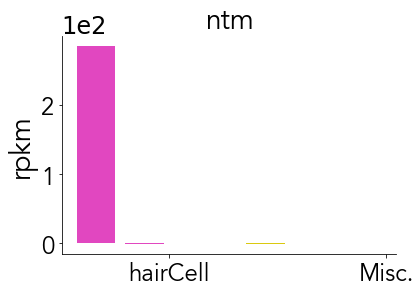

In [5]:
genename = 'ntm'
n,h = plotBars_haircell(genename)
fH, ax = plt.subplots()
pH = plt.bar(n,h, width=0.8, bottom=None, align='center', data=None, color=hcC['plt'])
formatFigure_haircell(genename, fH, ax, pH)

In [6]:
gdf = findgenelist_haircell('nrxn')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf[gdf.baseMean > 3]
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([4,24])
# gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf.sort_values(by=["padj"])
gdf

,symbol,genenames,hc01,hc02,hc04,in01,in02,in04,ensemblID
0,nrxn1a,neurexin 1a,0.163254,0.111820,0.192918,0.340423,0.328603,0.291515,ENSDARG00000061647
1,nrxn1b,neurexin 1b,1.241527,1.319926,1.886197,0.091680,0.089637,0.109226,ENSDARG00000063635
2,nrxn3a,neurexin 3a,0.082890,0.060999,0.072105,0.085846,0.072469,0.069048,ENSDARG00000043746
3,nrxn3b,neurexin 3b,0.121000,0.105864,0.121628,0.054063,0.052755,0.048606,ENSDARG00000062693
4,nrxn2a,neurexin 2a,0.081138,0.071421,0.100172,0.063491,0.057518,0.048887,ENSDARG00000061454


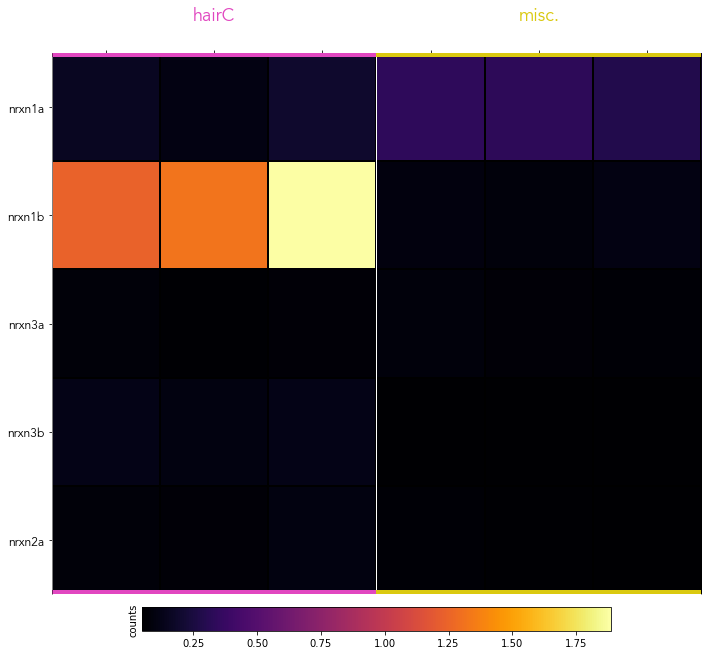

In [7]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = gdf.iloc[0:,2:8]

# log2matrix = np.vectorize(log2)
# data.iloc[0:,0:] = log2matrix(gdf.iloc[0:,5:41].values)

fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap_haircell(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="tmm")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
gdf = findgenelist_rods('rho')
# gdf = findgenelist_glia('rho')
# gdf = findgene_rods('saga')
gdf
# gdf.iloc[0,7:14]

In [ ]:
genename = 'rho'
n,h = plotBars_rods(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=rC['plt'])
formatFigure_rods(genename, fH, ax, pH)

# plt.savefig("{0}.svg".format(genename), transparent=True, format="svg")

In [ ]:
genename = 'rho'
n,h = plotBars_glia(genename)
fH, ax = plt.subplots()
pH = plt.bar(n, h, width=0.8, bottom=None, align='center', data=None, color=gC['plt'])

formatFigure_glia(genename, fH, ax, pH)

In [ ]:
# gdf = findgenelist('aldh1')
gdf = findgenelist_rods('ankrd33')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf[gdf.baseMean > 3]
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([4,24])
# gdf = gdf.sort_values(by=["symbol"])
gdf = gdf.sort_values(by=["padj"])

gdf

In [ ]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = gdf.iloc[0:,5:41]

# log2matrix = np.vectorize(log2)
# data.iloc[0:,0:] = log2matrix(gdf.iloc[0:,5:41].values)

fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap_glia(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="tmm")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

In [ ]:
log2matrix(gdf.iloc[0:,5:41].values)

In [ ]:
# gdf = findgenelist('aldh1')
gdf = findgenelist_rods('elovl')
# gdf = gdf.sort_values(by=["baseMean"],ascending=False)
# gdf = gdf[gdf.baseMean > 3]
# gdf = gdf.drop(np.arange(20,93))
# gdf = gdf.drop([4,24])
gdf = gdf.sort_values(by=["symbol"])
# gdf = gdf.sort_values(by=["padj"])
gdf

In [ ]:
genenames = gdf['symbol'].values
samplenames = [] #skipping names to replace in intaglio
data = gdf.iloc[0:,7:16]

# log2matrix = np.vectorize(log2)
# data.iloc[0:,0:] = log2matrix(gdf.iloc[0:,5:41].values)

fig, ax = plt.subplots(figsize=[12,12])
im, cbar = heatmap_rods(data, genenames, samplenames, ax=ax,
                   cmap="inferno", cbarlabel="fpkm")
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

# plt.savefig("{0}.svg".format(plotName), transparent=True, format="svg")
plt.show()

### Script to create modified table with DEG analysis from 192hpf and baseMean using only MG192 samples

In [ ]:
# df_tmm = pd.read_csv("~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/glia_23615_sup-0006-tables2.csv")
# # get rid of non-existing symbols
# df_tmm.symbol.fillna(df_tmm['symbol_g10'], inplace=True)
# df_tmm.symbol.fillna(df_tmm['ensemblID'], inplace=True)

# df_deg = pd.read_csv("~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/Table1_192hpf.csv")
# # sort DEG frame
# df_deg = df_deg.set_index('ensemblID')
# df_deg = df_deg.reindex(index=df_tmm['ensemblID'])
# df_deg = df_deg.reset_index()


# df = df_tmm.copy()

# df.drop(columns=['ensemblID', 'symbol_g10','GOid'], inplace=True)
# df['log2FoldChange'] = df_deg['logFC']
# df['baseMean'] = np.power(2,df_deg['logCPM'])
# df['padj'] = df_deg['PValue']

# df = df[['symbol', 'genename', 'log2FoldChange','baseMean', 'padj', 
#            '48MG1', '48MG2', '48MG3', '60MG1', '60MG2', '60MG3', '72MG1',
#            '72MG2', '72MG3', '96MG1', '96MG2', '96MG3', '120MG1', '120MG2',
#            '120MG3', '192MG1', '192MG2', '192MG3', '48C1', '48C2', '48C3', '60C1',
#            '60C2', '60C3', '72C1', '72C2', '72C3', '96C1', '96C2', '96C3', '120C1',
#            '120C2', '120C3', '192C1', '192C2', '192C3', 
#           ]]
# df.iloc[:,5:] = np.power(2,df.iloc[:,5:])
# df.to_csv('~/Documents/LiLab/RNAseq/zfMullerGlia_2018Charlton/glia8dpf_DEGcounts.csv', index=False)
# df.head()


### Script to create modified table for hair cell riboTAG data from zf 5 dpf (Mattern, 2018)

In [ ]:
# df_hc = pd.read_csv("~/Documents/LiLab/RNAseq/zfHairCells_Mattern2018/zfHairCells_rpkm.csv")
# df_hc.symbol.fillna(df_hc['ensemblID'], inplace=True)
# df_hc
# df_hc.to_csv('~/Documents/LiLab/RNAseq/zfHairCells_Mattern2018/zfHairCells_rpkm.csv', index=False)


### Script to create modified table with DEG analysis for microglia dataset (Mitchell, 2018)